In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish_market = pd.read_csv('data/Fish.csv')

In [3]:
fish_market.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
bream_length = fish_market.loc[ fish_market['Species']=='Bream']['Length2'].to_list()

In [5]:
bream_weight = list(fish_market.loc[ fish_market['Species']=='Bream']['Weight'])

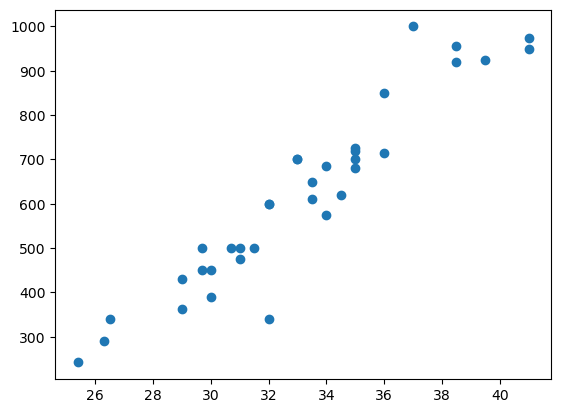

In [6]:
plt.scatter(bream_length, bream_weight)

In [7]:
smelt_length = list(fish_market.loc[ fish_market['Species']=='Smelt']['Length2'])
smelt_weight = list(fish_market.loc[ fish_market['Species']=='Smelt']['Weight'])

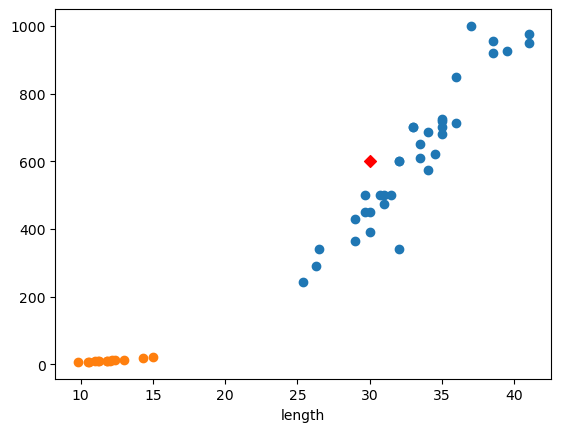

In [325]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600], color='red', marker='D')
plt.show()

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
fish_data = [[l, w] for l, w in zip(length, weight)] #  길이, 무게 리스트를 2차원으로 만든다 

In [11]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
len(fish_data)

49

In [13]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5) #  하이파 파라미터, 최근접 이웃 개수 

In [15]:
kn.fit(fish_data, fish_target )

KNeighborsClassifier()

In [16]:
kn.score(fish_data, fish_target) #  R 제곱 값 

1.0

In [17]:
kn.predict([[30, 600]])

array([1])

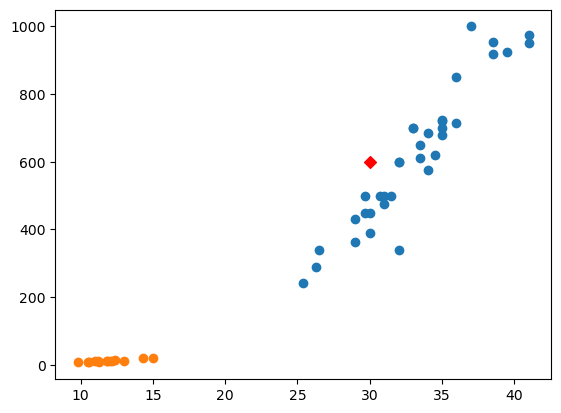

In [18]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30], [600] , marker='D', color='red')
plt.show()

In [19]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
35/49

0.7142857142857143

In [21]:
from sklearn.model_selection import train_test_split

In [97]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, test_size=0.3)
#  test_size 기본적으로 0.3(30%)의 테스트 데이터 크기를 갖는다 

In [89]:
len(fish_data)

49

In [91]:
print(len(train_input), len(test_target))

34 15


In [101]:
print(test_target)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [107]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, test_size=0.3, stratify=fish_target)

In [109]:
print(len(train_input), len(test_target))

34 15


In [111]:
print(test_target)

[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [43]:
49*0.7

34.3

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_input, train_target)

KNeighborsClassifier()

In [57]:
knn.score(test_input, test_target)

1.0

In [113]:
knn.predict([[25,150]])

array([0])

In [159]:
train_input

[[12.2, 12.2],
 [32.0, 600.0],
 [34.5, 620.0],
 [30.7, 500.0],
 [32.0, 600.0],
 [35.0, 720.0],
 [11.3, 8.7],
 [36.0, 714.0],
 [29.0, 430.0],
 [11.2, 9.8],
 [29.7, 500.0],
 [12.0, 9.8],
 [31.0, 475.0],
 [37.0, 1000.0],
 [29.0, 363.0],
 [33.0, 700.0],
 [14.3, 19.7],
 [31.5, 500.0],
 [39.5, 925.0],
 [9.8, 6.7],
 [36.0, 850.0],
 [10.5, 7.5],
 [33.5, 610.0],
 [10.6, 7.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [13.0, 12.2],
 [30.0, 450.0],
 [33.0, 700.0],
 [15.0, 19.9],
 [32.0, 340.0],
 [33.5, 650.0],
 [30.0, 390.0],
 [41.0, 975.0]]

In [231]:
train_input = np.array(train_input)
print(train_input.shape)

(34, 2)


In [233]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_input, train_target)

KNeighborsClassifier()

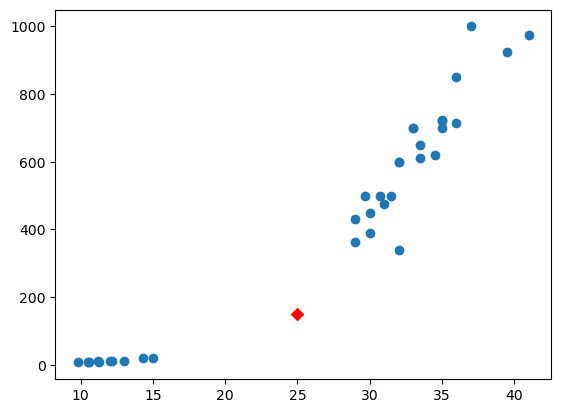

In [235]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.show()

In [237]:
knn.predict([[25,150]])

array([0])

In [239]:
distance, idxs = knn.kneighbors([[25, 150]])
print(distance)
print(idxs)

[[130.48375378 130.73859415 138.32150953 138.39320793 140.80142045]]
[[29 16 26  0 11]]


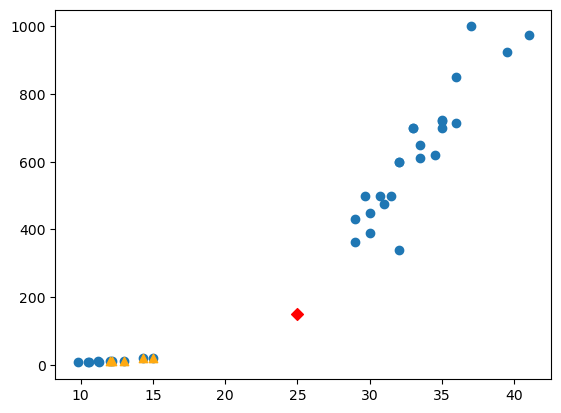

In [251]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.scatter(train_input[idxs, 0], train_input[idxs, 1], marker='^', color='#fa1')
plt.show()

In [ ]:
#  시각화는 잘 되었지만 무게, 길이의 표준화가 안되어서 이런 현상 발생 

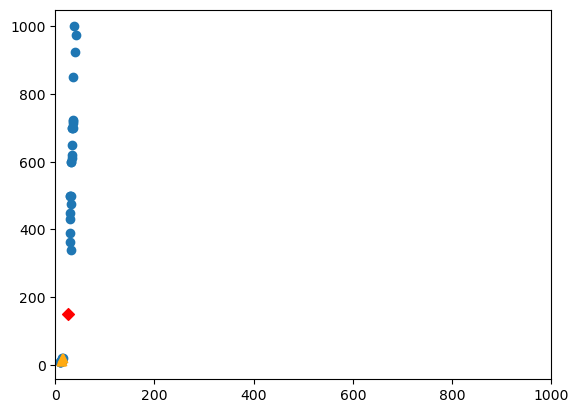

In [249]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.scatter(train_input[idxs, 0], train_input[idxs, 1], marker='^', color='#fa1')
plt.xlim(0, 1000)
plt.show()

정규화 : minmax
표준화 : standard 


표준화 : z-score 
평균 : np.mean()
편차 : 평균과의 차이값
분산 : 편차 제곱의 평균
표준편차 : 분산의 제곱근 , np.std()
표준점수 : x / 표준편차 

z-score = (x-mean)/std

In [253]:
train_input.shape

(34, 2)

In [255]:
train_input[:5]

array([[ 12.2,  12.2],
       [ 32. , 600. ],
       [ 34.5, 620. ],
       [ 30.7, 500. ],
       [ 32. , 600. ]])

In [261]:
aa = train_input/10
print(aa[:5])

[[ 1.22  1.22]
 [ 3.2  60.  ]
 [ 3.45 62.  ]
 [ 3.07 50.  ]
 [ 3.2  60.  ]]


In [319]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std
print(train_scaled[:5])
print(train_scaled.shape)

[[-1.4703534  -1.35773091]
 [ 0.49361864  0.48368306]
 [ 0.74159491  0.54633749]
 [ 0.36467098  0.17041086]
 [ 0.49361864  0.48368306]]
(34, 2)


-0.20071490885653048


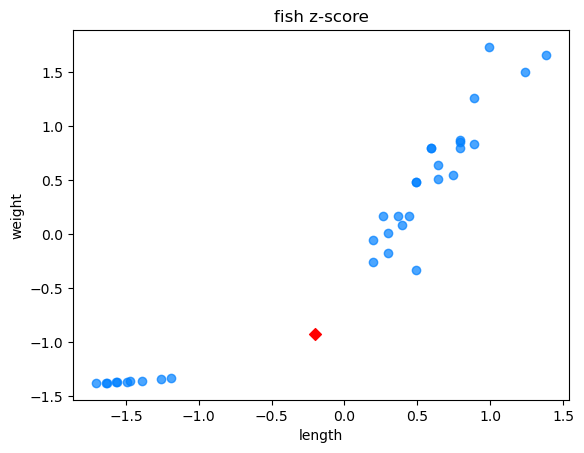

In [367]:
new = (([25, 150]) - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1], alpha=0.7, color='#0080ff')
plt.scatter(new[0], new[1] , marker='D', color='red')
plt.title('fish z-score')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [369]:
knn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [381]:
knn.predict([new])

array([1])

In [389]:
test_input_scaled = (test_input - mean) / std
knn.score(test_input_scaled, test_target)

1.0